## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2024-11-28 09:03:42--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9 [segue]
--2024-11-28 09:03:43--  https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc0438a61ab2c40cdd2387a11a21.dl.dropboxusercontent.com/cd/0/inline/CfOhO1FRfhE0CgrYuhKeUCDrxWINgojtuXiwciAQCVnsvT8NJIP2mjmL3SUHVJBy_qxkRUc9J0UF-HhZcz7pDgUIHyx317azQhz_eu9t9xG6TKaJAQHklzlNc75m2dcHa6o/file# [segue]
--2024-11-28 09:03:43--  https://uc0438a61ab2c40cdd2387a11a21.dl.dropboxusercontent.

In [44]:
import numpy as np
import pandas as pd
import numpy.random as npr
from matplotlib import pyplot as plt

### 1\. 
Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger than 10k.

In [56]:
# with open('/home/benedetto/data/data_000637.txt', 'r') as fin:
#     colonne = fin.readline().split(',')
#     df = pd.DataFrame(fin, columns=colonne)
# print(colonne)
# print("Type of message;   2 addresses;          3 timing information ")
# print(df.head())

# df1 = df[:10000]
# print(df1.tail())

# N = 10000
# df = pd.read_csv('/home/benedetto/data/data_000637.txt', delimiter=',', nrows=N)

df = pd.read_csv('/home/benedetto/data/data_000637.txt', delimiter=',')
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


### 2\. 
Find out the number of BX in a ORBIT (the value 'x').

In [46]:
# basta trovare il massimo tra i valori di BX
period = max(df.BX_COUNTER) +1
print(f"Period of ORBIT: {period}")

Period of ORBIT: 3564


### 3\. 
Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [47]:
# in seconds:
minimo = min(df.ORBIT_CNT)
massimo = max(df.ORBIT_CNT)
print(f"Tempoo di presa dati: {period*(massimo-minimo)*25/1000000000} secondi")

Tempoo di presa dati: 0.9804564 secondi


### 4\. 
Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [57]:
df['ORBIT_CNT'] = df['ORBIT_CNT'] - minimo

# creo una nuova colonna semplicemnte usando un nuovo label:
df["Tempo (ns)"] = (df['ORBIT_CNT'])*period*25  +  (df['BX_COUNTER'])*25  +  (df['TDC_MEAS']/30*25)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Tempo (ns)
0,1,0,123,0,2374,26,5.937167e+04
1,1,0,124,0,2374,27,5.937250e+04
2,1,0,63,0,2553,28,6.384833e+04
3,1,0,64,0,2558,19,6.396583e+04
4,1,0,64,0,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,11004,762,14,9.804755e+08
1310716,1,1,4,11004,763,11,9.804755e+08
1310717,1,0,64,11004,764,0,9.804755e+08
1310718,1,0,139,11004,769,0,9.804756e+08


### 5\. 
Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [58]:
df['HEAD'] = npr.randint(0,2, size=len(df))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Tempo (ns)
0,0,0,123,0,2374,26,5.937167e+04
1,1,0,124,0,2374,27,5.937250e+04
2,0,0,63,0,2553,28,6.384833e+04
3,0,0,64,0,2558,19,6.396583e+04
4,0,0,64,0,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,11004,762,14,9.804755e+08
1310716,0,1,4,11004,763,11,9.804755e+08
1310717,0,0,64,11004,764,0,9.804755e+08
1310718,1,0,139,11004,769,0,9.804756e+08


### 6\. 
Create a new DataFrame that contains only the rows with HEAD=1.

In [59]:
df1 = df[df['HEAD'] == 1]
df1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Tempo (ns)
1,1,0,124,0,2374,27,5.937250e+04
6,1,0,61,0,2772,14,6.931167e+04
7,1,0,139,0,2776,0,6.940000e+04
8,1,0,62,0,2774,21,6.936750e+04
12,1,1,6,0,2792,18,6.981500e+04
...,...,...,...,...,...,...,...
1310704,1,0,26,11004,19,15,9.804569e+08
1310713,1,0,64,11004,758,18,9.804754e+08
1310715,1,0,62,11004,762,14,9.804755e+08
1310718,1,0,139,11004,769,0,9.804756e+08


### 7\. 
Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

139


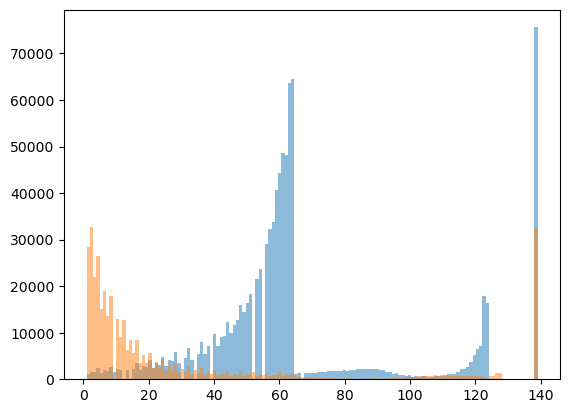

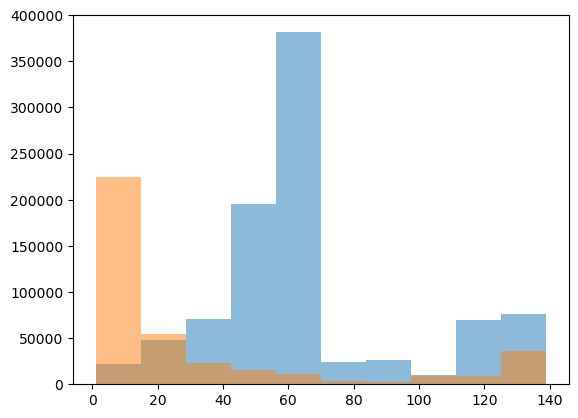

In [51]:
max_tdc = max(df['TDC_CHANNEL'])
print(max_tdc)

df2 = df[df['FPGA'] == 0]
df3 = df[df['FPGA'] == 1]
plt.hist( df2['TDC_CHANNEL'], bins=max_tdc, alpha=0.5 )
plt.hist( df3['TDC_CHANNEL'], bins=max_tdc, alpha=0.5 )
plt.show()


plt.hist( df2['TDC_CHANNEL'], alpha=0.5)
plt.hist( df3['TDC_CHANNEL'], alpha=0.5)
plt.show()

### 8\. 
Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [71]:
# la seguente riga conta nella colonna dei canali quante volte viene fuori ciascun canale e lo assegna a una nuova colonna 'Counts'
# df['Counts'] = df.groupby('TDC_CHANNEL')['TDC_CHANNEL'].transform('count')
# df

result = df.groupby('TDC_CHANNEL').size()
#result = df.groupby('TDC_CHANNEL').TDC_CHANNEL.count()
result = result.sort_values(ascending=False)
print(result[:4])
result[:4].index

TDC_CHANNEL
139    108059
64      66020
63      64642
61      49479
dtype: int64


Index([139, 64, 63, 61], dtype='int64', name='TDC_CHANNEL')

### 9\. 
Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [93]:
orbite = df.groupby('ORBIT_CNT').size()
print(len(orbite))
#orbite

filtered = df[df['TDC_CHANNEL'] == 139]
#filtered
filt_2 = filtered.groupby('ORBIT_CNT').size()
filt_2

11001


ORBIT_CNT
0         4
1         8
2        11
3         9
4         9
         ..
11000    19
11001     8
11002    13
11003    12
11004     2
Length: 10976, dtype: int64